---

<h1 style="text-align: center;font-size: 40px;">Tutorial: Upscaling images using ESRGAN</h1>

---

>ESRGAN is builted using a underlying architecture called Generative adversarial Network(GAN). GANs are capable of generating Fake data that looks realistic. Some of the GAN applications are to enhance the quality of the image. The high-level architecture of the GAN contains two main networks namely the generator network and the discriminator network. The generator network tries to generate the fake data and the discriminator network tries to distinguish between real and fake data, hence helping the generator to generate more realistic data.

>You can take your own low resolution images, pass it uthrough the pipeline and you will be able to get high resolution images generated through it. Now, in terms of using this model theres a couple of key things, that we need to set up:
> 1. Clone Github repository
> 2. Download pretrained model
> 3. Install dependencies

In [1]:
#Cloning github repo
!git clone https://github.com/xinntao/ESRGAN

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Total 225 (delta 0), reused 0 (delta 0), pack-reused 225
Receiving objects: 100% (225/225), 24.86 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (86/86), done.


>Let's see how this Git Repo looks like:

In [10]:
!pip install seedir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [11]:
import seedir as sd
sd.seedir('./', style='emoji')

📁 ./
├─📄 __notebook_source__.ipynb
├─📁 ESRGAN/
│ ├─📄 .gitignore
│ ├─📄 LICENSE
│ ├─📄 net_interp.py
│ ├─📁 figures/
│ │ ├─📄 net_interp.jpg
│ │ ├─📄 abalation_study.png
│ │ ├─📄 baboon.jpg
│ │ ├─📄 qualitative_cmp_02.jpg
│ │ ├─📄 patch_b.png
│ │ ├─📄 train_deeper_neta.png
│ │ ├─📄 81.gif
│ │ ├─📄 43074.gif
│ │ ├─📄 train_deeper_netb.png
│ │ ├─📄 patch_a.png
│ │ ├─📄 qualitative_cmp_01.jpg
│ │ ├─📄 RRDB.png
│ │ ├─📄 qualitative_cmp_04.jpg
│ │ ├─📄 qualitative_cmp_03.jpg
│ │ ├─📄 BN_artifacts.jpg
│ │ ├─📄 architecture.jpg
│ │ └─📄 102061.gif
│ ├─📄 RRDBNet_arch.py
│ ├─📄 transer_RRDB_models.py
│ ├─📄 README.md
│ ├─📄 test.py
│ ├─📁 models/
│ │ └─📄 README.md
│ ├─📁 LR/
│ │ ├─📄 baboon.png
│ │ └─📄 comic.png
│ ├─📄 QA.md
│ ├─📁 results/
│ │ └─📄 baboon_ESRGAN.png
│ └─📁 .git/
│   ├─📄 index
│   ├─📁 objects/
│   │ ├─📁 pack/
│   │ │ ├─📄 pack-096a18d65683532f4d1a5fc1e9fdc31274367629.pack
│   │ │ └─📄 pack-096a18d65683532f4d1a5fc1e9fdc31274367629.idx
│   │ └─📁 info/
│   ├─📁 branches/
│   ├─📁 logs/
│   │ ├─📄 HEAD
│   │ └─📁 refs

> To download the pretrained model from google drive directly from here, i'm going to use a library called gdown:

In [2]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=2a1df4ec0377e68f6965f487da4e082893875bbecd505d3d9e865e1609747167
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown


In [ ]:
#import gdown
# url = 'https://drive.google.com/file/d/1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene/uc?usp=sharing'
# output = 'RRDB_ESRGAN_x4.pth'
# gdown.download(url, output, quiet=False)

In [6]:
# downloading the model 
import warnings
warnings.filterwarnings("ignore")
!gdown --id 1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene
To: /kaggle/working/RRDB_ESRGAN_x4.pth
100%|███████████████████████████████████████| 66.9M/66.9M [00:00<00:00, 273MB/s]


>Now installing some necessary dependencies for ESRGAN

In [7]:
!pip install opencv-python glob2

  Preparing metadata (setup.py) ... done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=1d94be3eb1d2ad4930592d16f093ef3e070ef7bbef287653c0d2299ad23fa101
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
Successfully built glob2


In [8]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


> 

>Now, ESRGAN requires to have the pre-trained model under the model folder of the github repository. So, we have to move the pretrained model which we download before from google drive, to the model folder. If you do this on your local machine, you can just, copy-paste the model, but since i'm doing it on kaggle kernel so, i need to do it through some code.

In [12]:
import os, shutil
source = "./RRDB_ESRGAN_x4.pth"
destination = "./ESRGAN/models/"
shutil.move(source,destination)

'./ESRGAN/models/RRDB_ESRGAN_x4.pth'

In [13]:
import seedir as sd
sd.seedir('./', style='emoji')

📁 ./
├─📄 __notebook_source__.ipynb
├─📁 ESRGAN/
│ ├─📄 .gitignore
│ ├─📄 LICENSE
│ ├─📄 net_interp.py
│ ├─📁 figures/
│ │ ├─📄 net_interp.jpg
│ │ ├─📄 abalation_study.png
│ │ ├─📄 baboon.jpg
│ │ ├─📄 qualitative_cmp_02.jpg
│ │ ├─📄 patch_b.png
│ │ ├─📄 train_deeper_neta.png
│ │ ├─📄 81.gif
│ │ ├─📄 43074.gif
│ │ ├─📄 train_deeper_netb.png
│ │ ├─📄 patch_a.png
│ │ ├─📄 qualitative_cmp_01.jpg
│ │ ├─📄 RRDB.png
│ │ ├─📄 qualitative_cmp_04.jpg
│ │ ├─📄 qualitative_cmp_03.jpg
│ │ ├─📄 BN_artifacts.jpg
│ │ ├─📄 architecture.jpg
│ │ └─📄 102061.gif
│ ├─📄 RRDBNet_arch.py
│ ├─📄 transer_RRDB_models.py
│ ├─📄 README.md
│ ├─📄 test.py
│ ├─📁 models/
│ │ ├─📄 README.md
│ │ └─📄 RRDB_ESRGAN_x4.pth
│ ├─📁 LR/
│ │ ├─📄 baboon.png
│ │ └─📄 comic.png
│ ├─📄 QA.md
│ ├─📁 results/
│ │ └─📄 baboon_ESRGAN.png
│ └─📁 .git/
│   ├─📄 index
│   ├─📁 objects/
│   │ ├─📁 pack/
│   │ │ ├─📄 pack-096a18d65683532f4d1a5fc1e9fdc31274367629.pack
│   │ │ └─📄 pack-096a18d65683532f4d1a5fc1e9fdc31274367629.idx
│   │ └─📁 info/
│   ├─📁 branches/
│   ├─📁 logs/
│ 

>- We can see that our pretrained model successfully shifted under the model folder.
>Now,For testing, you need to add your images under the LR folder of the git repository. Here, i'm going to add some images for testing purpose. For that i'm downloading some images from my drive first. Then i'll move these images under the LR folder.

In [14]:
!gdown --id 1sdB-k6-XHzN8WfAA51d8l1b7Q0TH9iBt
!gdown --id 1JIlrwnID8-sb16DByx2vmnXIfCrFBOFb
!gdown --id 1-dl-OtffdxzIgtYjZ8fQXkzkCNLEDSHu
!gdown --id 1TAaSaVzf7Lfw6yT2ROuuiPSwnuCoYsRT
!gdown --id 1v_9DWkmPVyBVR3Ax_OVepMhvmFXVsScT

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sdB-k6-XHzN8WfAA51d8l1b7Q0TH9iBt
To: /kaggle/working/horse.jpg
100%|██████████████████████████████████████| 5.40k/5.40k [00:00<00:00, 8.18MB/s]
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JIlrwnID8-sb16DByx2vmnXIfCrFBOFb
To: /kaggle/working/image2.jpg
100%|██████████████████████████████████████| 53.2k/53.2k [00:00<00:00, 57.7MB/s]
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't n

In [15]:
#moving these images under the LR folder
for i in os.listdir("./"):
    if "im" in i:
        source = f"./{i}"
        destination = "./ESRGAN/LR/"
        shutil.move(source,destination)

In [16]:
source = "./horse.jpg"
destination = "./ESRGAN/LR/"
shutil.move(source,destination)

'./ESRGAN/LR/horse.jpg'

In [17]:
!pwd

/kaggle/working


> Now, to train the model which is under the ESRGAN folder. You, need to go to this directory. So, first we'll shift our working directory then we need to run the script called
test.py, which is going to train the model.

In [18]:
%cd ESRGAN
!python test.py

/kaggle/working/ESRGAN
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 image2
2 img3
3 img6
4 horse
5 img5
6 baboon
7 comic


In [20]:
%cd /kaggle/working/

/kaggle/working


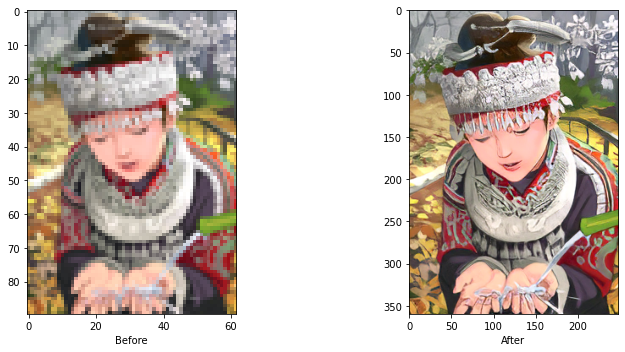

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
img1 = plt.imread(f"./ESRGAN/LR/comic.png")
plt.subplot(1,2,1)
plt.xlabel("Before")
plt.imshow(img1)

img2 = plt.imread(f"./ESRGAN/results/comic_rlt.png")
plt.subplot(1,2,2)
plt.xlabel("After")
plt.imshow(img2)
plt.tight_layout()
plt.show()

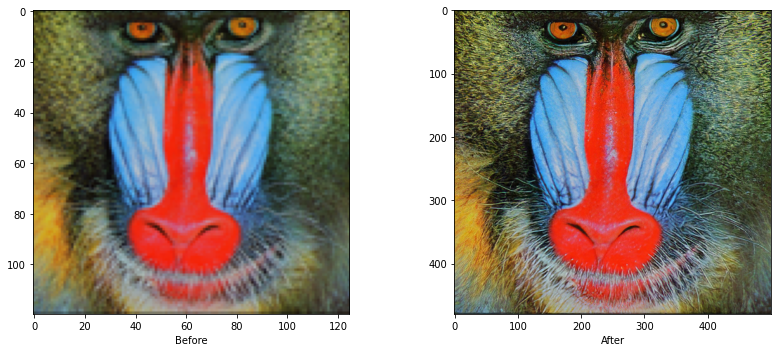

In [24]:
plt.figure(figsize=(12,5))
img1 = plt.imread(f"./ESRGAN/LR/baboon.png")
plt.subplot(1,2,1)
plt.xlabel("Before")
plt.imshow(img1)

img2 = plt.imread(f"./ESRGAN/results/baboon_rlt.png")
plt.subplot(1,2,2)
plt.xlabel("After")
plt.imshow(img2)
plt.tight_layout()
plt.show()

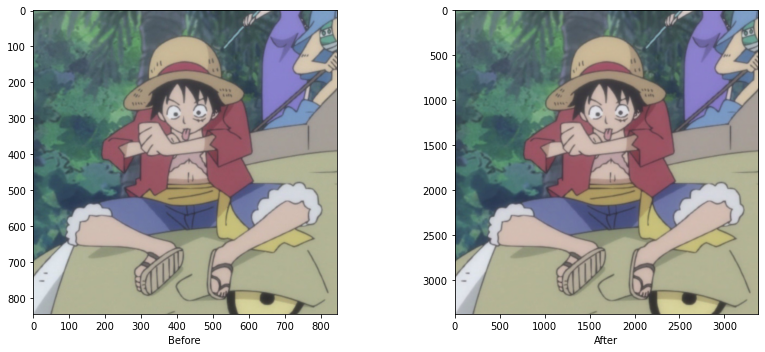

In [30]:
plt.figure(figsize=(12,5))
img1 = plt.imread(f"./ESRGAN/LR/img3.jpg")
plt.subplot(1,2,1)
plt.xlabel("Before")
plt.imshow(img1)

img2 = plt.imread(f"./ESRGAN/results/img3_rlt.png")
plt.subplot(1,2,2)
plt.xlabel("After")
plt.imshow(img2)
plt.tight_layout()
plt.show()

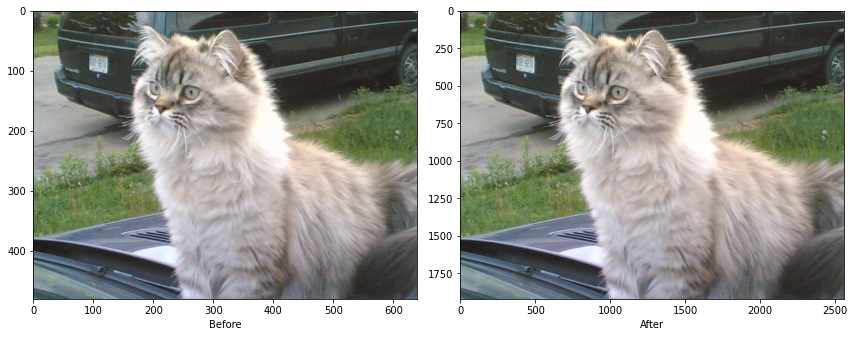

In [31]:
plt.figure(figsize=(12,5))
img1 = plt.imread(f"./ESRGAN/LR/img6.jpg")
plt.subplot(1,2,1)
plt.xlabel("Before")
plt.imshow(img1)

img2 = plt.imread(f"./ESRGAN/results/img6_rlt.png")
plt.subplot(1,2,2)
plt.xlabel("After")
plt.imshow(img2)
plt.tight_layout()
plt.show()